In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt

import misc

In [2]:
dataset_path = "/mnt/c/Users/vmangr/OneDrive - TUNI.fi/Shared/GEOLOC/dataset/"
#dataset_path = "/mnt/c/Users/Antoine/OneDrive - TUNI.fi/Shared/GEOLOC/dataset/"

# Open-sky

In [3]:
survey = 'S1'
folder_path = f"{dataset_path}{survey}"
acq_list = [f"A{i:d}" for i in range(1, 11)]
device_android = ['A52', 'GP7', 'GPW', 'SW6']
device_uliss = ['UA', 'U1']
files_type = ['RINEX', 'RAW', 'MAT']

In [4]:
# Load Android files
log_android = {}
log_android = misc.load_raw(folder_path, acq_list, device_android, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey)

In [5]:
# # Load ULISS RINEX files
# log_rinex = {}
# log_rinex = misc.load_rinex(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey)

In [6]:
# Load ULISS Matlab files
log_mat = {}
log_mat = misc.load_mat(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey)

In [7]:
# Load ULISS Matlab files
log_mat_cn0 = {}
log_mat_cn0 = misc.load_mat_cn0(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey)

In [8]:
# import scipy
# import numpy as np

# # (GPS: 1-32, GLO: 33-58, GAL : 59-94)

# columns = ['tow']
# columns += [f'G{i:02d}' for i in range(1,33)]
# columns += [f'R{i:02d}' for i in range(1,27)]
# columns += [f'E{i:02d}' for i in range(1,37)]

# filepath = f"{folder_path}/A7/UA/gnss.mat"
# mat = scipy.io.loadmat(filepath)

# df = pd.DataFrame()
# # L1 
# _df = np.concatenate((mat['GNSS']['time'][0][0], mat['GNSS']['snr_1'][0][0]), axis=1)
# _df = pd.DataFrame(_df, columns=columns)
# _df = _df.melt(id_vars=['tow'], var_name='prn', value_name='cn0').dropna()
# _df['frequency'] = 'L1'
# df = pd.concat([df, _df],  axis=0)
# df
# # L2/L5
# _df = np.concatenate((mat['GNSS']['time'][0][0], mat['GNSS']['snr_2'][0][0]), axis=1)
# _df = pd.DataFrame(_df, columns=columns)
# _df = _df.melt(id_vars=['tow'], var_name='prn', value_name='cn0').dropna()
# _df['frequency'] = 'L1'
# _df['frequency'].loc[_df["prn"].str.contains('G')] = 'L2'
# _df['frequency'].loc[_df["prn"].str.contains('R')] = 'L2'
# _df['frequency'].loc[_df["prn"].str.contains('E')] = 'L5'
# df = pd.concat([df, _df],  axis=0)
# df

## Texting

In [9]:
log_dict = misc.selectMode([log_android, log_mat_cn0], mode=['TEXTING'])

Text(0.5, 1.0, 'Open-sky (texting)')

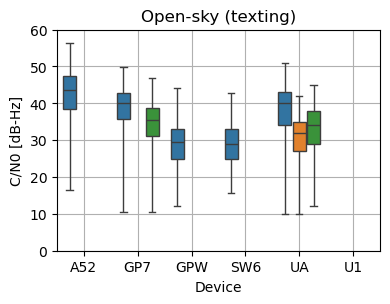

In [10]:
misc.plotBoxPlotCN0PerFrequency(log_dict, device_android, device_uliss)
plt.title("Open-sky (texting)")

## Swinging

In [11]:
log_dict = misc.selectMode([log_android, log_mat_cn0], mode=['SWINGING'])

Text(0.5, 1.0, 'Open-sky (swinging)')

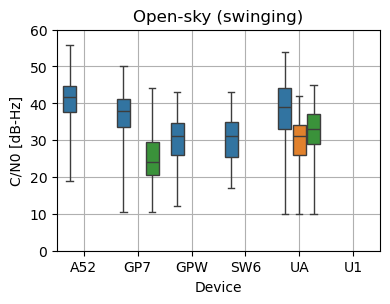

In [12]:
misc.plotBoxPlotCN0PerFrequency(log_dict, device_android, device_uliss)
plt.title("Open-sky (swinging)")

## Pocket

In [13]:
log_dict = misc.selectMode([log_android, log_mat_cn0], mode=['POCKET'])

Text(0.5, 1.0, 'Open-sky (pocket)')

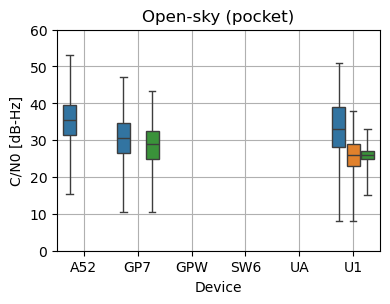

In [14]:
misc.plotBoxPlotCN0PerFrequency(log_dict, device_android, device_uliss)
plt.title("Open-sky (pocket)")

## Comparing CN0 between modes

In [9]:
#log_dict = misc.selectMode([log_android, log_rinex], mode=['SWINGING', 'TEXTING', 'POCKET'])
log_dict = misc.selectMode([log_android, log_mat_cn0], mode=['SWINGING', 'TEXTING', 'POCKET'])

In [10]:
# Filter observations to keep only GPS, GALILEO, GLONASS valid (code lock and TOW/TOD known)
log_dict_filtered = {}
for device, log in log_dict.items():
    if device in device_android:
        log_dict_filtered[device] = misc.selectValidSatellites(log)

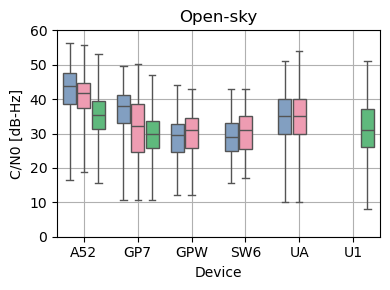

In [11]:
misc.plotBoxPlotCN0PerMode(log_dict, device_android, device_uliss)
plt.title("Open-sky")
plt.tight_layout()
plt.savefig(f'./Figures/cn0_boxplot_mode_{survey}.png', dpi=300)
# 

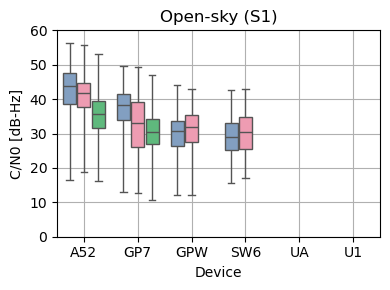

In [12]:
misc.plotBoxPlotCN0PerMode(log_dict_filtered, device_android, device_uliss)
plt.title("Open-sky (S1)")
plt.tight_layout()
plt.savefig(f'./Figures/cn0_boxplot_mode_{survey}_filtered.png', dpi=300)

## Comparing signal tracked between mode

In [26]:
log_dict = misc.selectMode([log_android, log_mat], mode=['SWINGING', 'TEXTING', 'POCKET'])

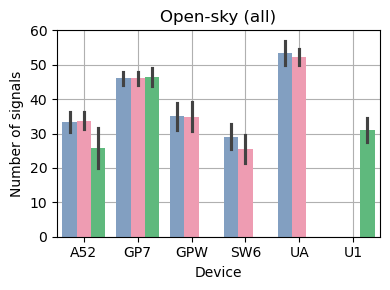

In [28]:
misc.plotBarSignalsPerMode(log_dict, device_android, device_uliss)

plt.title("Open-sky (all)")
plt.tight_layout()
plt.savefig(f'./Figures/signals_bar_mode_all_{survey}.png', dpi=300)

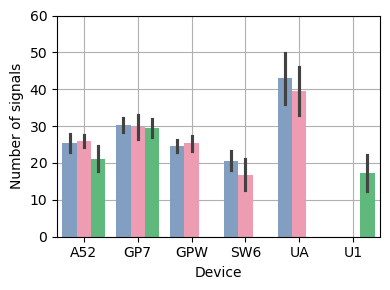

In [40]:
# Filter observations to keep only GPS, GALILEO, GLONASS valid (code lock and TOW/TOD known)
log_dict_filtered = {}
for device, log in log_dict.items():
    if device in device_android:
        log_dict_filtered[device] = misc.selectValidSatellites(log)
    if device in device_uliss:
        log_dict_filtered[device] = log.copy()
        log_dict_filtered[device]['num_sat'] = log['num_sat_valid']

misc.plotBarSignalsPerMode(log_dict_filtered, device_android, device_uliss)

#plt.title("Open-sky (filtered by tracking state)")
plt.tight_layout()
plt.savefig(f'./Figures/signals_bar_mode_filtered_{survey}_track.png', dpi=300)

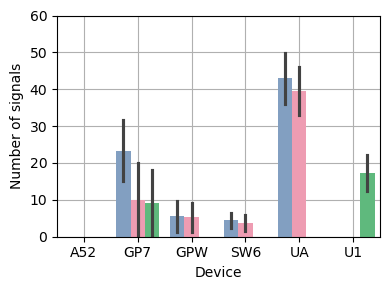

In [41]:
# Filter observations to keep only GPS, GALILEO, GLONASS phase valid
log_dict_filtered = {}
for device, log in log_dict.items():
    if device in device_android:
        log_dict_filtered[device] = misc.selectValidSatellitesPhases(log)
    if device in device_uliss:
        log_dict_filtered[device] = log.copy()
        log_dict_filtered[device]['num_sat'] = log['num_sat_valid']

misc.plotBarSignalsPerMode(log_dict_filtered, device_android, device_uliss)

#plt.title("Open-sky (filtered by phase state)")
plt.tight_layout()
plt.savefig(f'./Figures/signals_bar_mode_filtered_{survey}_phase.png', dpi=300)

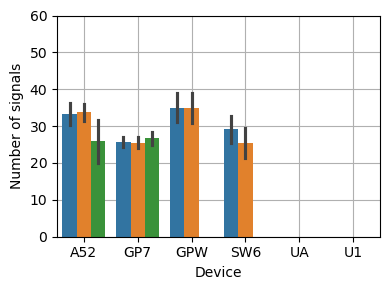

In [25]:
misc.plotBarSatellitesPerMode(log_dict, device_android, device_uliss)

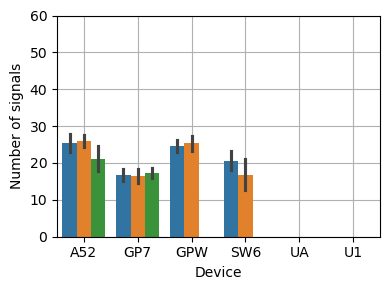

In [26]:
misc.plotBarSatellitesPerMode(log_dict_filtered, device_android, device_uliss)

# Light indoor (train station)

In [133]:
survey = 'S3'
folder_path = folder_path = f"{dataset_path}{survey}"
acq_list = ['A1', 'A2', 'A3', 'A4']
device_android = ['A52', 'GP7', 'GPW', 'SW6']
device_uliss = ['UA', 'U1']
files_type = ['RINEX', 'RAW', 'MAT']

In [134]:
# Load Android files
log_android = {}
log_android = misc.load_raw(folder_path, acq_list, device_android, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey, 
                            indoor_only=True)

In [135]:
# # Load ULISS RINEX files
# log_rinex = {}
# log_rinex = misc.load_rinex(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey,
#                             indoor_only=True)

In [136]:
# Load ULISS Matlab files
log_mat = {}
log_mat = misc.load_mat(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey,
                        indoor_only=True)

In [137]:
# Load ULISS Matlab files
log_mat_cn0 = {}
log_mat_cn0 = misc.load_mat_cn0(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey,
                                indoor_only=True)

## Texting

In [139]:
log_dict = misc.selectMode([log_android, log_mat_cn0], mode=['TEXTING'])

Text(0.5, 1.0, 'Light indoor (texting)')

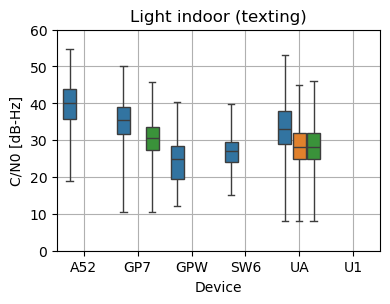

In [140]:
misc.plotBoxPlotCN0PerFrequency(log_dict, device_android, device_uliss)
plt.title("Light indoor (texting)")
 

## Swinging

In [141]:
log_dict = misc.selectMode([log_android, log_mat_cn0], mode=['SWINGING'])

Text(0.5, 1.0, 'Light indoor (swinging)')

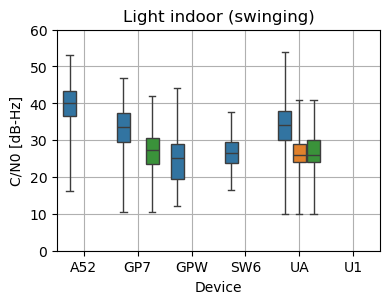

In [142]:
misc.plotBoxPlotCN0PerFrequency(log_dict, device_android, device_uliss)
plt.title("Light indoor (swinging)")
 

## Pocket

In [143]:
log_dict = misc.selectMode([log_android, log_mat_cn0], mode=['POCKET'])

Text(0.5, 1.0, 'Light indoor (pocket)')

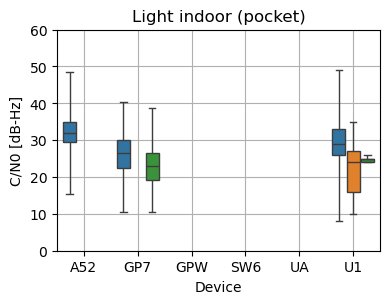

In [144]:
misc.plotBoxPlotCN0PerFrequency(log_dict, device_android, device_uliss)
plt.title("Light indoor (pocket)")
 

## Comparing modes

In [145]:
log_dict = misc.selectMode([log_android, log_mat_cn0], mode=['SWINGING', 'TEXTING', 'POCKET'])

In [146]:
# Filter observations to keep only GPS, GALILEO, GLONASS valid (code lock and TOW/TOD known)
log_dict_filtered = {}
for device, log in log_dict.items():
    if device in device_android:
        log_dict_filtered[device] = misc.selectValidSatellites(log)

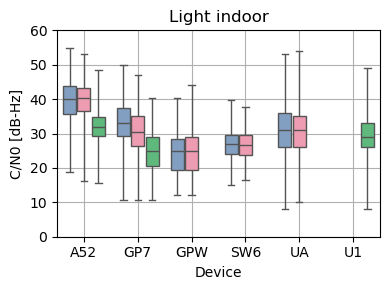

In [147]:
misc.plotBoxPlotCN0PerMode(log_dict, device_android, device_uliss)

plt.title("Light indoor")
plt.tight_layout()
plt.savefig(f'./Figures/cn0_boxplot_mode_{survey}.png', dpi=300)

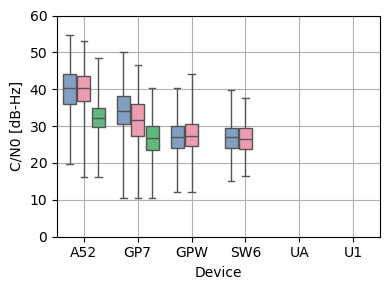

In [148]:
misc.plotBoxPlotCN0PerMode(log_dict_filtered, device_android, device_uliss)

Text(0.5, 1.0, 'Open-sky')

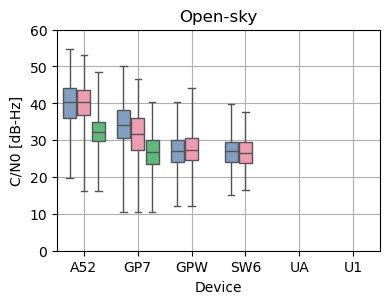

In [149]:
misc.plotBoxPlotCN0PerMode(log_dict_filtered, device_android, device_uliss)
plt.title("Open-sky")
 

## Comparing number of satellites

In [150]:
log_dict = misc.selectMode([log_android, log_mat], mode=['SWINGING', 'TEXTING', 'POCKET'])

In [151]:
# Filter observations to keep only GPS, GALILEO, GLONASS valid (code lock and TOW/TOD known)
log_dict_filtered = {}
for device, log in log_dict.items():
    if device in device_android:
        log_dict_filtered[device] = misc.selectValidSatellitesPhases(log)
    if device in device_uliss:
        log_dict_filtered[device] = log.copy()
        log_dict_filtered[device]['num_sat'] = log['num_sat_valid']

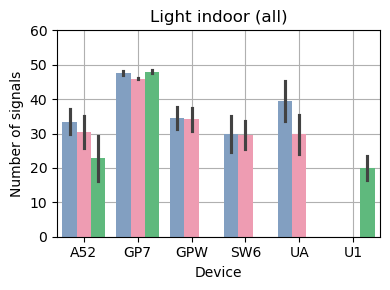

In [152]:
misc.plotBarSignalsPerMode(log_dict, device_android, device_uliss)

plt.title("Light indoor (all)")
plt.tight_layout()
plt.savefig(f'./Figures/signals_bar_mode_all_{survey}.png', dpi=300)

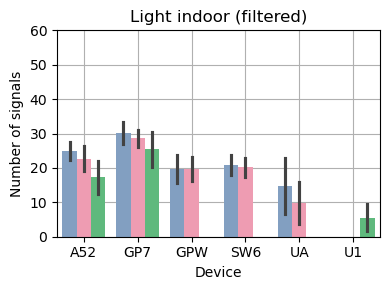

In [153]:
misc.plotBarSignalsPerMode(log_dict_filtered, device_android, device_uliss)

plt.title("Light indoor (filtered)")
plt.tight_layout()
plt.savefig(f'./Figures/signals_bar_mode_filtered_{survey}.png', dpi=300)

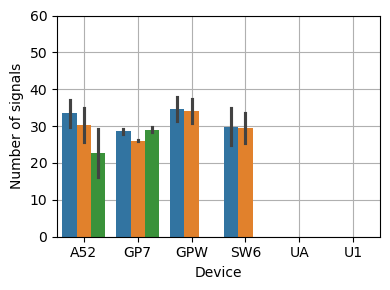

In [154]:
misc.plotBarSatellitesPerMode(log_dict, device_android, device_uliss)

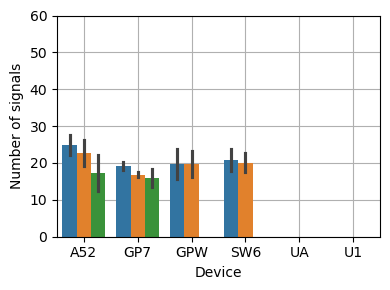

In [155]:
misc.plotBarSatellitesPerMode(log_dict_filtered, device_android, device_uliss)

# Urban canyioning 

In [49]:
survey = 'S4'
folder_path = folder_path = f"{dataset_path}{survey}"
acq_list = ['A1', 'A2']
device_android = ['A52', 'GP7', 'GPW', 'SW6']
device_uliss = ['UA', 'U1']
files_type = ['RINEX', 'RAW', 'MAT']

In [50]:
# Load Android files
log_android = {}
log_android = misc.load_raw(folder_path, acq_list, device_android, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey)

In [51]:
# # Load ULISS RINEX files
# log_rinex = {}
# log_rinex = misc.load_rinex(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey)

In [52]:
# Load ULISS Matlab files
log_mat = {}
log_mat = misc.load_mat(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey)

In [53]:
# Load ULISS Matlab files
log_mat_cn0 = {}
log_mat_cn0 = misc.load_mat_cn0(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey)

## Texting

In [54]:
log_dict = misc.selectMode([log_android, log_mat_cn0], mode=['TEXTING'])

Text(0.5, 1.0, 'Urban canyoning (texting)')

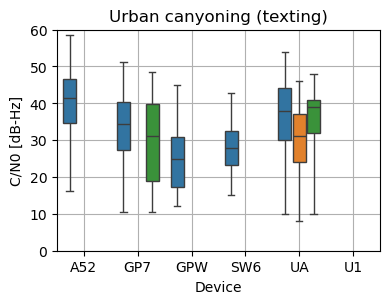

In [55]:
misc.plotBoxPlotCN0PerFrequency(log_dict, device_android, device_uliss)
plt.title("Urban canyoning (texting)")
 

## Swinging
NOT APPLICABLE 

## Pocket

## Comparing modes

In [90]:
log_dict = misc.selectMode([log_android, log_mat_cn0], mode=['SWINGING', 'TEXTING', 'POCKET'])

In [91]:
# Filter observations to keep only GPS, GALILEO, GLONASS valid (code lock and TOW/TOD known)
log_dict_filtered = {}
for device, log in log_dict.items():
    if device in device_android:
        log_dict_filtered[device] = misc.selectValidSatellites(log)

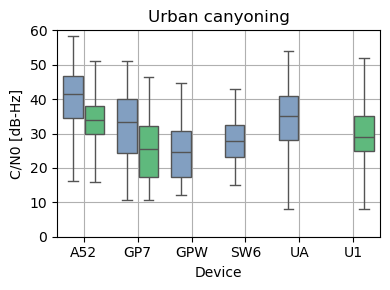

In [92]:
misc.plotBoxPlotCN0PerMode(log_dict, device_android, device_uliss, mode=['TEXTING', 'POCKET'])

plt.title("Urban canyoning")
plt.tight_layout()
plt.savefig(f'./Figures/cn0_boxplot_mode_{survey}.png', dpi=300)

Text(0.5, 1.0, 'Urban canyoning')

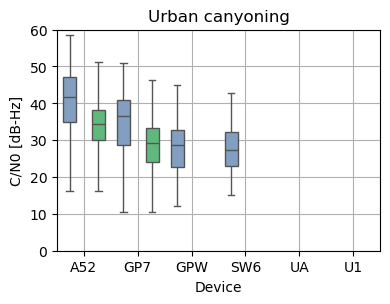

In [93]:
misc.plotBoxPlotCN0PerMode(log_dict_filtered, device_android, device_uliss)
plt.title("Urban canyoning")
 

Text(0.5, 1.0, 'Urban canyoning')

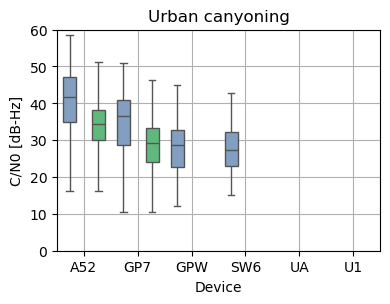

In [94]:
misc.plotBoxPlotCN0PerMode(log_dict_filtered, device_android, device_uliss)
plt.title("Urban canyoning")
 

In [95]:
log_dict = misc.selectMode([log_android, log_mat], mode=['SWINGING', 'TEXTING', 'POCKET'])

In [96]:
# Filter observations to keep only GPS, GALILEO, GLONASS valid (code lock and TOW/TOD known)
log_dict_filtered = {}
for device, log in log_dict.items():
    if device in device_android:
        log_dict_filtered[device] = misc.selectValidSatellites(log)
    if device in device_uliss:
        log_dict_filtered[device] = log.copy()
        log_dict_filtered[device]['num_sat'] = log['num_sat_valid']

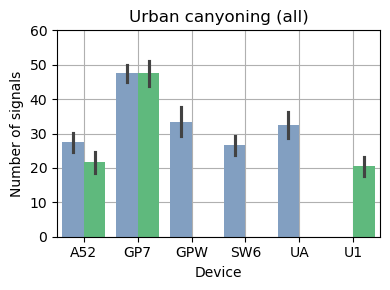

In [97]:
misc.plotBarSignalsPerMode(log_dict, device_android, device_uliss, mode=['TEXTING', 'POCKET'])

plt.title("Urban canyoning (all)")
plt.tight_layout()
plt.savefig(f'./Figures/signals_bar_mode_all_{survey}.png', dpi=300)

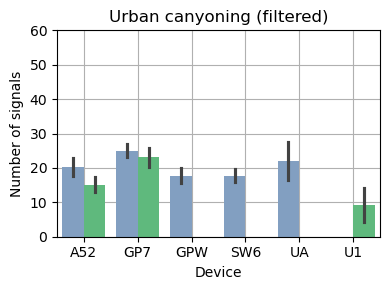

In [98]:
misc.plotBarSignalsPerMode(log_dict_filtered, device_android, device_uliss, mode=['TEXTING', 'POCKET'])

plt.title("Urban canyoning (filtered)")
plt.tight_layout()
plt.savefig(f'./Figures/signals_bar_mode_filtered_{survey}.png', dpi=300)

In [99]:
log_dict = misc.selectMode([log_android, log_mat_cn0], mode=['POCKET'])

Text(0.5, 1.0, 'Urban canyoning (pocket)')

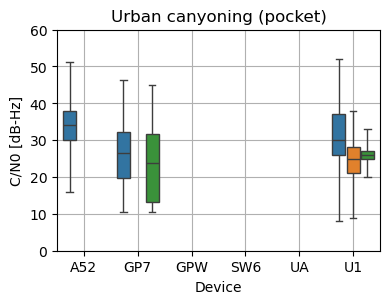

In [100]:
misc.plotBoxPlotCN0PerFrequency(log_dict, device_android, device_uliss)
plt.title("Urban canyoning (pocket)")
 

## Comparing number of satellite between modes

In [101]:
log_dict = misc.selectMode([log_android, log_mat], mode=['SWINGING', 'TEXTING', 'POCKET'])

In [102]:
# Filter observations to keep only GPS, GALILEO, GLONASS valid (code lock and TOW/TOD known)
log_dict_filtered = {}
for device, log in log_dict.items():
    if device in device_android:
        log_dict_filtered[device] = misc.selectValidSatellites(log)
    if device in device_uliss:
        log_dict_filtered[device] = log.copy()
        log_dict_filtered[device]['num_sat'] = log['num_sat_valid']

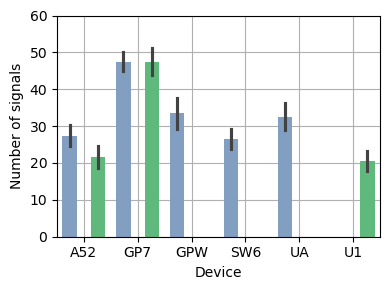

In [103]:
misc.plotBarSignalsPerMode(log_dict, device_android, device_uliss)

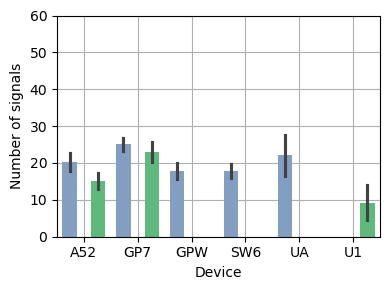

In [104]:
misc.plotBarSignalsPerMode(log_dict_filtered, device_android, device_uliss)

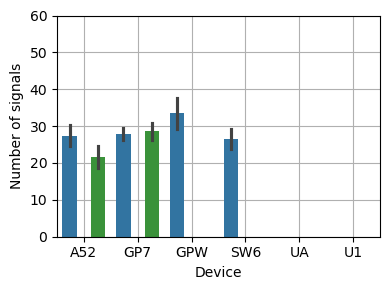

In [105]:
misc.plotBarSatellitesPerMode(log_dict, device_android, device_uliss)

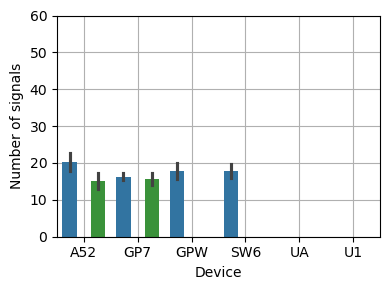

In [106]:
misc.plotBarSatellitesPerMode(log_dict_filtered, device_android, device_uliss)